In [4]:
!pip install pyedflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 6.5 MB/s eta 0:00:00a 0:00:010m


In [14]:
import matplotlib.pyplot as plt
import pathlib
import mne
from glob import glob
import os
import pandas
import numpy as np
# import pyedflib

In [90]:
allfile = glob("../input/eeg-motor-movementimagery-dataset/files/*/*.edf")
len(allfile)

1526

In [2]:
t4_files = sorted(glob("../input/eeg-motor-movementimagery-dataset/files/*/*04.edf"))

In [53]:
t6_files = sorted(glob("../input/eeg-motor-movementimagery-dataset/files/*/*06.edf"))

In [61]:
t8_files = sorted(glob("../input/eeg-motor-movementimagery-dataset/files/*/*08.edf"))

In [68]:
t10_files = sorted(glob("../input/eeg-motor-movementimagery-dataset/files/*/*10.edf"))

In [74]:
t12_files = sorted(glob("../input/eeg-motor-movementimagery-dataset/files/*/*12.edf"))

In [80]:
t14_files = sorted(glob("../input/eeg-motor-movementimagery-dataset/files/*/*14.edf"))

In [ ]:
# t4_files

In [81]:

signals = []
labels = []
bad_signals = []
for f in t14_files:
    sig = pyedflib.EdfReader(f)
    n = sig.signals_in_file
    
    signal_labels = sig.getSignalLabels()
    sigbuf = np.zeros((n, sig.getNSamples()[0]))

    for j in np.arange(n):
        sigbuf[j, :] = sig.readSignal(j)
    # (n,3) annotations: [t in s, duration, type T0/T1/T2]
    annotations = sig.read_annotation()
    
    new_annot = []
    for ann in annotations:
        tmp = []
        tmp.append(ann[0])
        tmp.append(ann[1].decode())
        if ann[-1].decode()[-1] == '1':        
            tmp.append("T3")
        elif ann[-1].decode()[-1] == '2':
            tmp.append("T4")
        else:
            tmp.append("-1")
        new_annot.append(tmp)
    
    for i in range(n):
#         print("Electorde", i+1)
        
        for annotation in new_annot:
            start = int((annotation[0]/10000000)*160)
            end = int(((annotation[0]/10000000)+ 4)*160)
            if (end-start) != 640:
                print(end-start, annotation, i)
#             print(annotation[-1],"\tStart :",start, ", end in",end, " duration:", end-start )
            if annotation[-1] != "-1":
                if sigbuf[i,start:end].shape[0] == 640:
                    signals.append(sigbuf[i,start:end])
                    labels.append([annotation[-1],i+1])
                else:
                    bad_signals.append([f, i+1, start, end, annotation[-1]])
    sig.close()
    

In [41]:
for s in signals:
    if len(s) != 640:
        print("here", len(s))

In [82]:
signals = np.array(signals)
labels = np.array(labels)

In [83]:
signals.shape, labels.shape

((104256, 640), (104256, 2))

In [49]:
import pandas as pd

In [85]:
DF = pd.DataFrame(signals)
DF.to_csv("./data14.csv")

In [52]:
!zip -r all_f.zip "./"

  adding: data1.csv (deflated 76%)
  adding: .virtual_documents/ (stored 0%)
  adding: __notebook_source__.ipynb (deflated 44%)


In [9]:
# raw = mne.io.read_raw(t2file[5])
# events = mne.events_from_annotations(raw)

Extracting EDF parameters from /kaggle/input/eeg-motor-movementimagery-dataset/files/S086/S086R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']


In [16]:
# raw.get_data()

array([[ 9.6e-05,  9.6e-05,  6.8e-05, ...,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 6.1e-05,  6.1e-05,  2.9e-05, ...,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 5.1e-05,  4.4e-05,  1.9e-05, ...,  0.0e+00,  0.0e+00,  0.0e+00],
       ...,
       [-2.6e-05, -3.4e-05, -6.5e-05, ...,  0.0e+00,  0.0e+00,  0.0e+00],
       [-7.0e-06, -1.3e-05, -3.9e-05, ...,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 3.5e-05,  1.7e-05, -1.0e-05, ...,  0.0e+00,  0.0e+00,  0.0e+00]])

Using matplotlib as 2D backend.


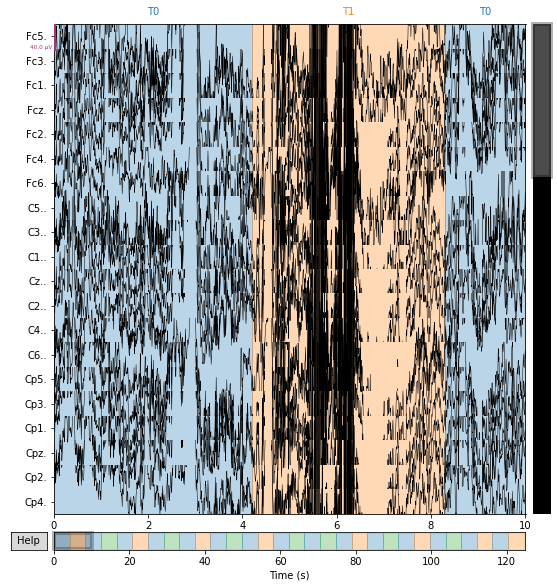

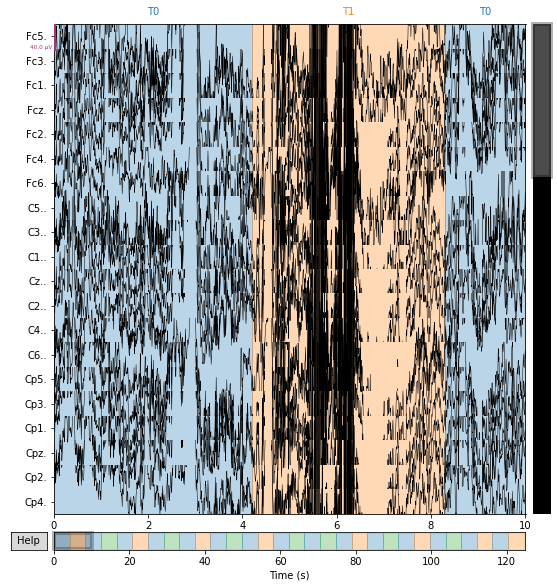

In [10]:
# raw.plot()

In [31]:
allfile[5]

'../input/eeg-motor-movementimagery-dataset/files/S025/S025R08.edf'

In [9]:
sig = pyedflib.EdfReader("../input/eeg-motor-movementimagery-dataset/files/S001/S001R04.edf")
n = sig.signals_in_file

In [154]:
n

64

In [10]:
signal_labels = sig.getSignalLabels()
sigbuf = np.zeros((n, sig.getNSamples()[0]))

for j in np.arange(n):
    sigbuf[j, :] = sig.readSignal(j)
# (n,3) annotations: [t in s, duration, type T0/T1/T2]
annotations = sig.read_annotation()

In [11]:
annotations

[[0, b'4.2', b'T0'],
 [42000000, b'4.1', b'T2'],
 [83000000, b'4.2', b'T0'],
 [125000000, b'4.1', b'T1'],
 [166000000, b'4.2', b'T0'],
 [208000000, b'4.1', b'T1'],
 [249000000, b'4.2', b'T0'],
 [291000000, b'4.1', b'T2'],
 [332000000, b'4.2', b'T0'],
 [374000000, b'4.1', b'T2'],
 [415000000, b'4.2', b'T0'],
 [457000000, b'4.1', b'T1'],
 [498000000, b'4.2', b'T0'],
 [540000000, b'4.1', b'T2'],
 [581000000, b'4.2', b'T0'],
 [623000000, b'4.1', b'T1'],
 [664000000, b'4.2', b'T0'],
 [706000000, b'4.1', b'T2'],
 [747000000, b'4.2', b'T0'],
 [789000000, b'4.1', b'T1'],
 [830000000, b'4.2', b'T0'],
 [872000000, b'4.1', b'T1'],
 [913000000, b'4.2', b'T0'],
 [955000000, b'4.1', b'T2'],
 [996000000, b'4.2', b'T0'],
 [1038000000, b'4.1', b'T1'],
 [1079000000, b'4.2', b'T0'],
 [1121000000, b'4.1', b'T2'],
 [1162000000, b'4.2', b'T0'],
 [1204000000, b'4.1', b'T1']]

In [12]:
new_annot = []
for ann in annotations:
    tmp = []
    tmp.append(ann[0])
    tmp.append(ann[1].decode())
    if ann[-1].decode()[-1] == '1':        
        tmp.append("Left MI")
    elif ann[-1].decode()[-1] == '2':
        tmp.append("Right MI")
    else:
        tmp.append("Rest")
    new_annot.append(tmp)


In [50]:
for annotation in new_annot:
    start = int((annotation[0]/10000000)*160)
    end = int(((annotation[0]/10000000)+ 4)*160)
    print(annotation[-1],"\tStart :",start, ", end in",end, " duration:", end-start )

Rest 	Start : 0 , end in 640  duration: 640
Right MI 	Start : 672 , end in 1312  duration: 640
Rest 	Start : 1328 , end in 1968  duration: 640
Left MI 	Start : 2000 , end in 2640  duration: 640
Rest 	Start : 2656 , end in 3296  duration: 640
Left MI 	Start : 3328 , end in 3968  duration: 640
Rest 	Start : 3984 , end in 4624  duration: 640
Right MI 	Start : 4656 , end in 5296  duration: 640
Rest 	Start : 5312 , end in 5952  duration: 640
Right MI 	Start : 5984 , end in 6624  duration: 640
Rest 	Start : 6640 , end in 7280  duration: 640
Left MI 	Start : 7312 , end in 7952  duration: 640
Rest 	Start : 7968 , end in 8608  duration: 640
Right MI 	Start : 8640 , end in 9280  duration: 640
Rest 	Start : 9296 , end in 9936  duration: 640
Left MI 	Start : 9968 , end in 10608  duration: 640
Rest 	Start : 10624 , end in 11264  duration: 640
Right MI 	Start : 11296 , end in 11936  duration: 640
Rest 	Start : 11952 , end in 12592  duration: 640
Left MI 	Start : 12624 , end in 13264  duration: 640
R

In [15]:
signals, annotations = sigbuf.transpose(), annotations

In [20]:
sigbuf.shape[1]

19680

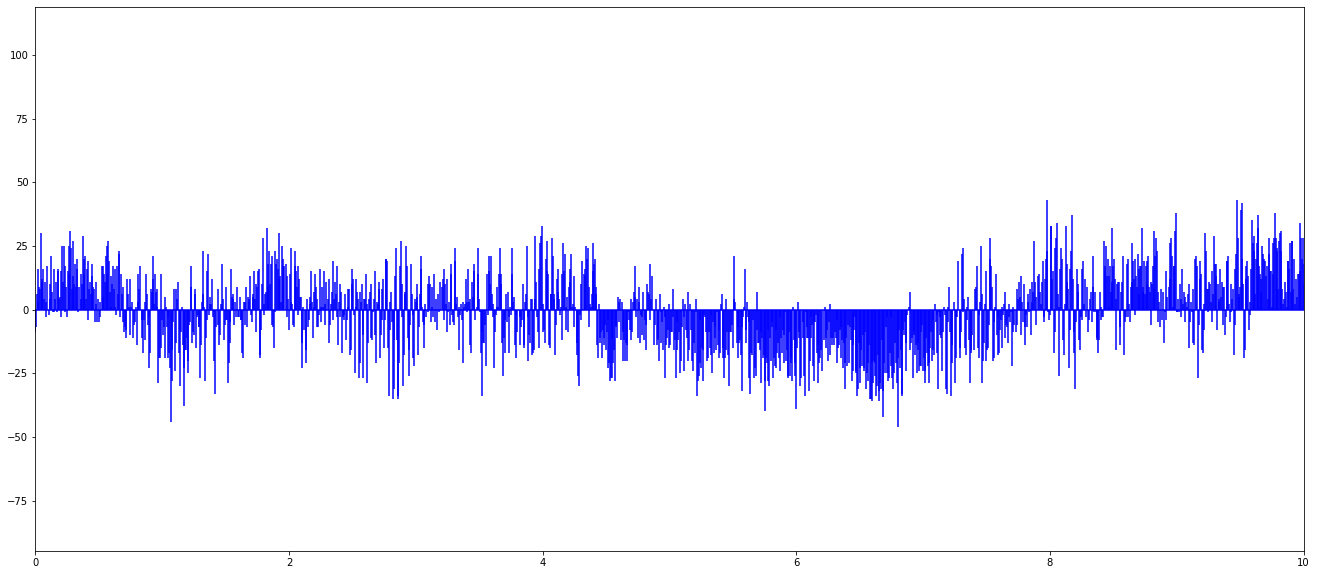

In [14]:

# sampling rate
sr = 160
# sampling interval
ts = 1/sr
t = np.arange(0,123,ts)

# Fast Fourier Transform

X = sigbuf[0]
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (50, 10))
plt.subplot(121)

plt.stem(t, X, 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('')
plt.ylabel('')
plt.xlim(0, 10)

# plt.subplot(122)
# plt.plot(t, data[1], 'r')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.tight_layout()
plt.show()

In [11]:
import mne
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
file= "../input/eeg-motor-movementimagery-dataset/files/S088/S088R04.edf"
data = mne.io.read_raw_edf(file)
x = data.get_data()

Extracting EDF parameters from /kaggle/input/eeg-motor-movementimagery-dataset/files/S088/S088R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [14]:
sig = pyedflib.EdfReader("../input/eeg-motor-movementimagery-dataset/files/S088/S088R04.edf")
n = sig.signals_in_file

signal_labels = sig.getSignalLabels()
sigbuf = np.zeros((n, sig.getNSamples()[0]))

for j in np.arange(n):
    sigbuf[j, :] = sig.readSignal(j)
# (n,3) annotations: [t in s, duration, type T0/T1/T2]
annotations = sig.read_annotation()

In [33]:
sigbuf[0,15808:-1].shape

(63,)

In [39]:
(annotations[-1][0]/10000000) * 160

18944.0

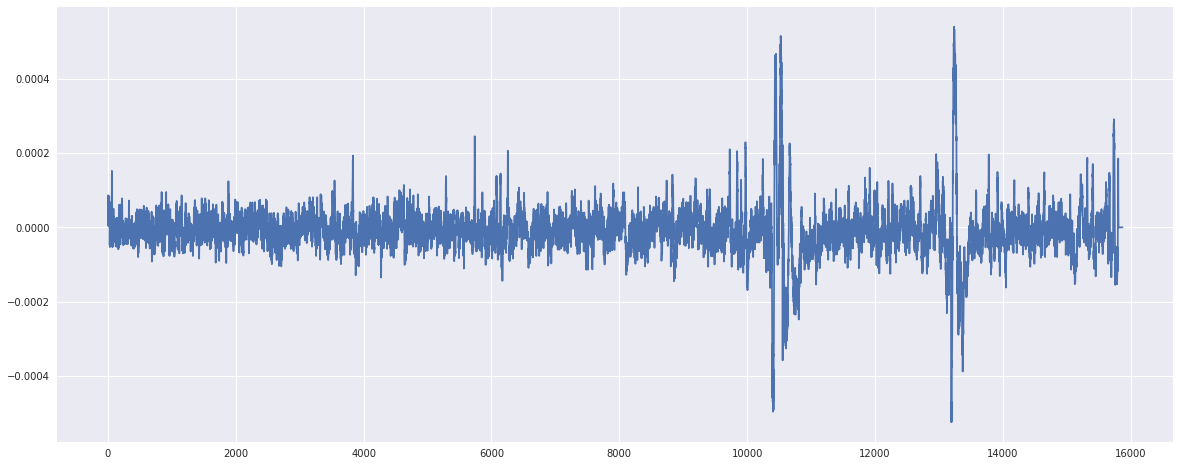

In [12]:
plt.figure(figsize = (20, 8))
plt.plot(x[0])

In [2]:
import numpy as np

import mne

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score

from mne import Epochs, pick_types, find_events, pick_types, set_eeg_reference
from mne.channels import read_layout
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP
from mne import viz

%matplotlib inline 

In [2]:
raw = read_raw_edf("../input/eeg-motor-movementimagery-dataset/files/S001/S001R01.edf", preload=True, stim_channel='auto', verbose=False)
raw

<RawEDF | S001R01.edf, 64 x 9760 (61.0 s), ~4.8 MB, data loaded>

In [3]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>

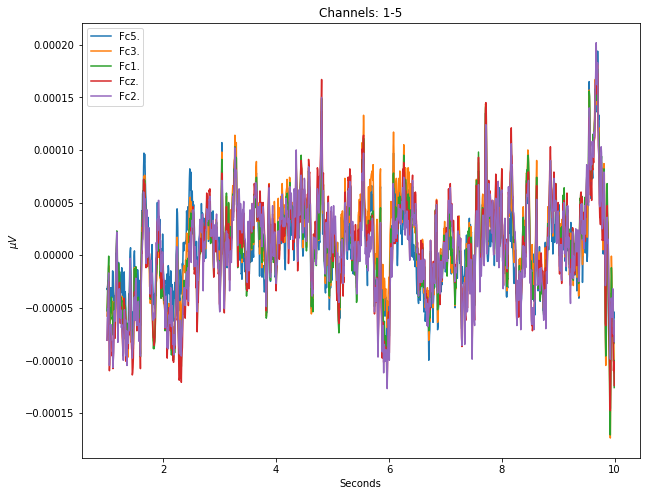

In [4]:
# Extract data from the first 5 channels, from 1 s to 3 s.
sfreq = raw.info['sfreq']
sfreq = raw.info['sfreq']
data, times = raw[:5, int(sfreq * 1):int(sfreq * 10)]

fig = plt.subplots(figsize=(10,8))
plt.plot(times, data.T);
plt.xlabel('Seconds')
plt.ylabel('$\mu V$')
plt.title('Channels: 1-5');
plt.legend(raw.ch_names[:5]);

In [5]:
# Apply band-pass filter
raw.filter(7., 30., fir_design='firwin', skip_by_annotation='edge')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


<RawEDF | S001R01.edf, 64 x 9760 (61.0 s), ~4.8 MB, data loaded>

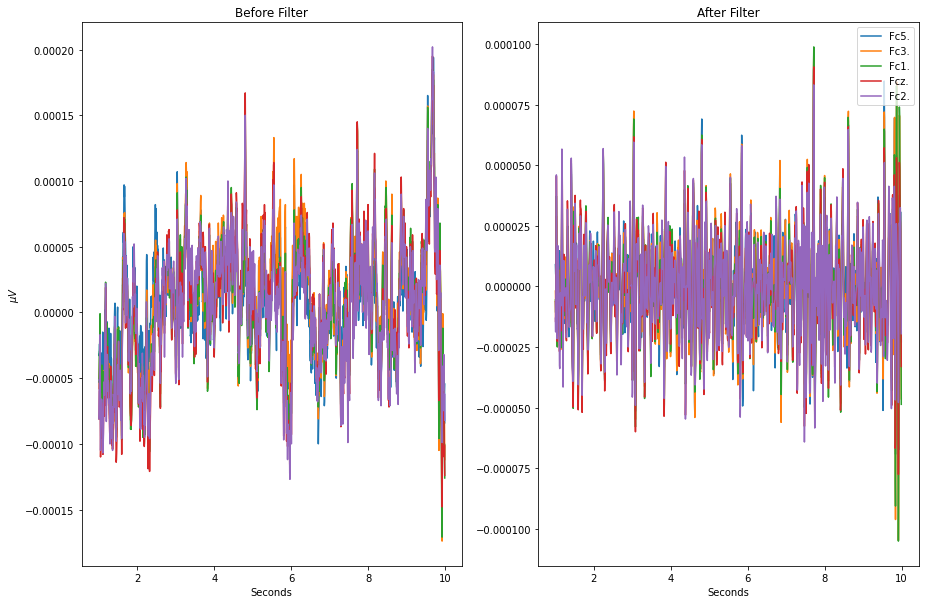

In [6]:
data_f, times_f = raw[:5, int(sfreq * 1):int(sfreq * 10)]

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 10))

ax1.plot(times, data.T);
ax1.set_title('Before Filter')
ax1.set_xlabel('Seconds')
ax1.set_ylabel('$\mu V$')

ax2.plot(times_f, data_f.T);
ax2.set_title('After Filter')
ax2.set_xlabel('Seconds')

plt.legend(raw.ch_names[:5], loc=1);
# plt.tight_layout()

Using matplotlib as 2D backend.


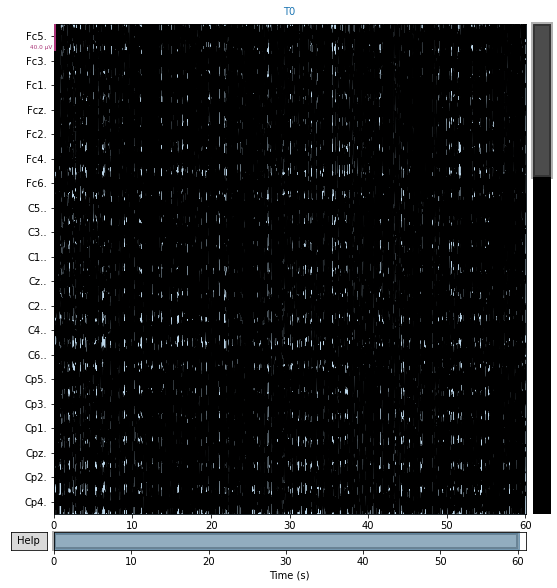

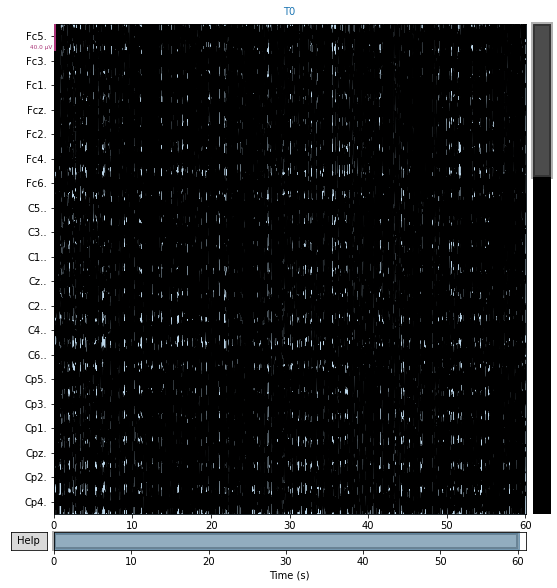

In [7]:
# %matplotlib qt
raw.plot(duration=60, block=True)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.600 (s)


/tmp/ipykernel_23/1301482982.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(tmax=np.inf, fmax=80)


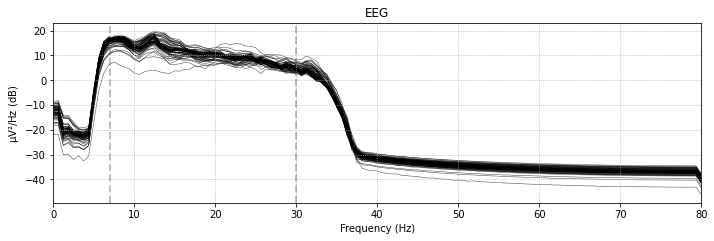

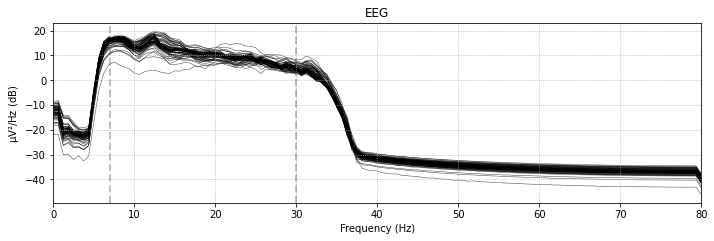

In [9]:
# %matplotlib qt
raw.plot_psd(tmax=np.inf, fmax=80)

In [15]:
%matplotlib inline
picks = pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                   exclude='bads')

# events.shap|e
events = mne.events_from_annotations(raw)

epochs = Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                baseline=None, preload=True, verbose=False)

# remove channels that aren't eeg electrodes we care about
epochs.drop_channels(ch_names=['Nose', 'REOG', 'LEOG', 'IEOG', 'SEOG', 'M1', 'M2','EXG8'])

# Export data in tabular structure as a pandas DataFrame.
epochs_df = epochs.to_data_frame()


evoked = epochs['target'].average()
evoked.plot()

Used Annotations descriptions: ['T0']


NameError: name 'event_id' is not defined

In [36]:
import statistics as st

In [43]:
for i,ei in enumerate(x):
    print(i,st.mean(ei))

0 -7.604508196721312e-07
1 2.040061475409836e-06
2 2.0797131147540983e-06
3 2.8452868852459016e-06
4 1.4572745901639343e-06
5 3.059323770491803e-06
6 1.751639344262295e-06
7 -1.894672131147541e-06
8 2.3582991803278686e-06
9 1.8688524590163937e-07
10 2.388217213114754e-06
11 2.6922131147540984e-06
12 -1.2242827868852459e-06
13 -6.287909836065574e-07
14 -4.634221311475409e-07
15 -1.6557377049180322e-07
16 -7.770491803278688e-07
17 -6.493852459016393e-07
18 -1.1547131147540983e-07
19 -5.043032786885246e-07
20 1.347233606557377e-06
21 -8.763217213114754e-06
22 -7.782786885245901e-06
23 -8.68954918032787e-06
24 -1.0696823770491803e-05
25 -9.142418032786885e-06
26 -2.9642418032786883e-06
27 -4.7329918032786885e-06
28 -6.5051229508196715e-06
29 -2.354610655737705e-06
30 -5.617827868852459e-06
31 -1.671311475409836e-06
32 -1.4334016393442625e-07
33 -8.379098360655737e-07
34 -4.5471311475409834e-07
35 -8.71311475409836e-07
36 -1.163422131147541e-06
37 -1.7753073770491804e-06
38 -2.3829918032786

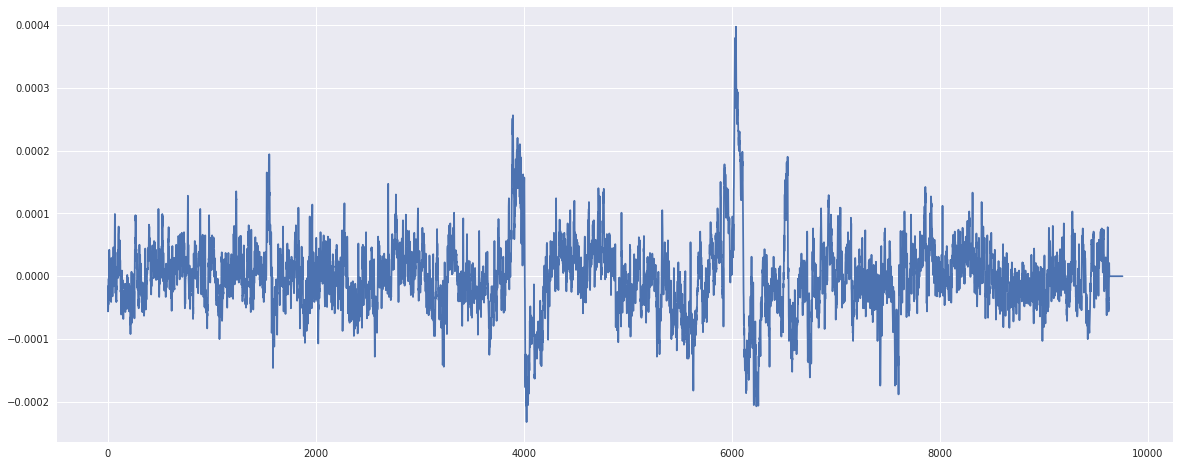

In [44]:
plt.figure(figsize = (20, 8))
plt.plot(x[0])

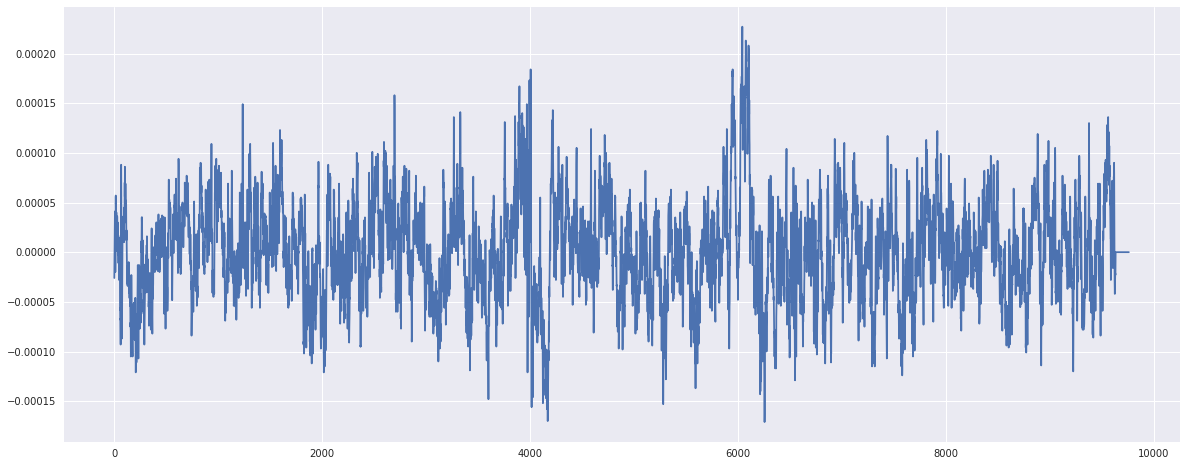

In [45]:

plt.figure(figsize = (20, 8))
plt.plot(x[51])

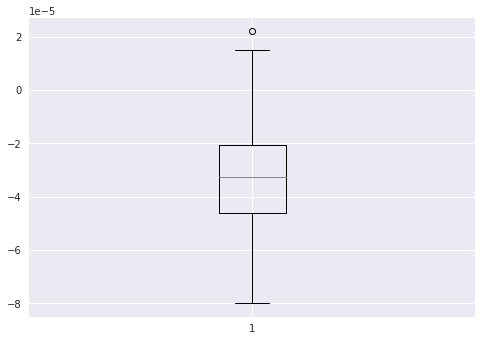

In [47]:
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax.boxplot(x[:,0])
plt.show()

In [48]:
x[:,0]

array([-1.6e-05, -2.9e-05,  2.0e-06,  2.2e-05, -1.2e-05, -2.3e-05,
       -4.6e-05, -3.6e-05, -2.6e-05, -1.8e-05, -4.0e-06, -4.0e-06,
       -2.0e-05, -2.2e-05, -3.3e-05, -3.9e-05, -2.3e-05, -1.2e-05,
       -1.6e-05, -2.7e-05, -2.5e-05, -4.9e-05, -4.4e-05, -2.9e-05,
       -7.3e-05, -6.7e-05, -4.1e-05, -3.9e-05, -6.2e-05, -3.9e-05,
       -4.2e-05, -1.6e-05, -3.6e-05, -3.8e-05, -4.6e-05, -6.0e-05,
       -6.9e-05, -2.5e-05, -4.7e-05, -8.0e-05, -7.1e-05, -3.2e-05,
       -5.2e-05,  1.0e-06, -5.8e-05, -3.0e-05, -5.6e-05, -4.3e-05,
       -1.2e-05, -1.8e-05, -3.1e-05, -2.6e-05, -3.7e-05, -3.3e-05,
       -3.0e-05, -5.6e-05, -5.2e-05, -3.5e-05, -2.2e-05, -3.3e-05,
       -5.3e-05, -2.1e-05, -1.1e-05,  1.5e-05])

In [49]:

from numpy.fft import fft, ifft



In [51]:
x[0].shape

(9760,)

[-7.42200000e-03+0.00000000e+00j  1.15439827e-02-1.57285462e-02j
  7.59627863e-03+7.45231548e-03j ... -6.92039252e-05+9.32763367e-05j
  4.97903606e-04+2.87220243e-04j -3.54000000e-04+0.00000000e+00j]


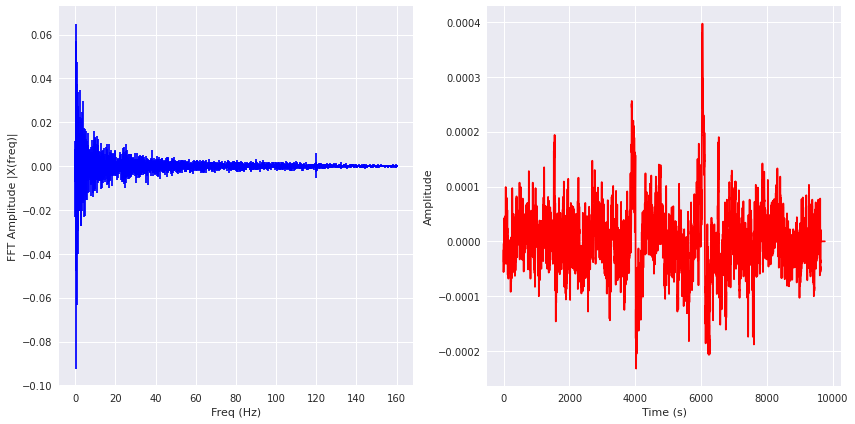

In [90]:
#visualize the data

# sampling rate
sr = 160
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

# Fast Fourier Transform
data = x[0]
X = np.fft.rfft(data)

print(X)


N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, X, 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
# plt.xlim(0, 10)

plt.subplot(122)
plt.plot(data, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [92]:
import numpy as np

# Let's say here is your signal
signal = x[51]

fourier = np.fft.rfft(signal)
n = signal.size
sample_rate = 160
freq = np.fft.fftfreq(n, d=1./sample_rate)

In [93]:
freq = np.fft.rfftfreq(n, d=1./sample_rate)

In [95]:
n

9760

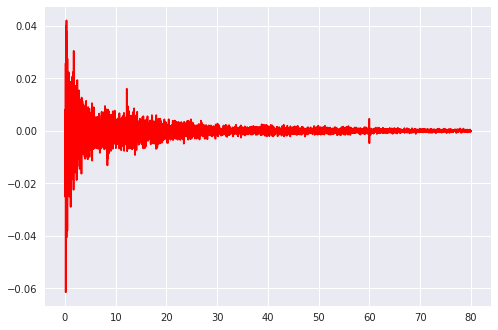

In [99]:
plt.plot(freq, fourier, 'r')
# plt.xlim(0, 2)
plt.show()

In [101]:
import scipy

In [111]:
coor = scipy.signal.correlate(x[0],x[1])

In [113]:
coor = scipy.signal.correlate(coor,x[2])

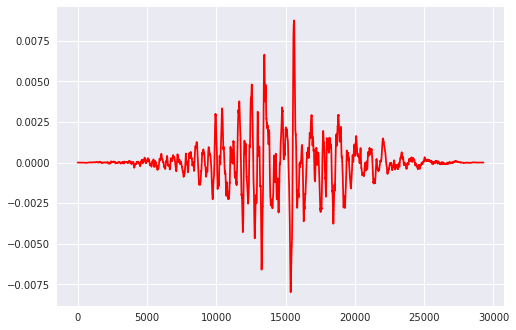

In [114]:
plt.plot(coor, 'r')
# plt.xlim(0, 2)
plt.show()